# Sunrise 
#LSR +01h to LSR +7.30h

- This is for getting the complete diurnal cycle. 
- Sea breeze occured within sunrise and sunset.

In [ ]:
import pandas as pd

In [41]:
sunrise_sunset_data = pd.read_csv('/home1/nalex2023/main/LSB_main/LSB_detectionv2/Datasets/sunrise_sunset_twp.csv')
sunrise_sunset_data['sunrise(UTC)'] = pd.to_datetime(sunrise_sunset_data['sunrise(UTC)'])
sunrise_sunset_data['sunset(UTC)'] = pd.to_datetime(sunrise_sunset_data['sunset(UTC)'])

mean_sunrise = (sunrise_sunset_data['sunrise(UTC)'].dt.hour + sunrise_sunset_data['sunrise(UTC)'].dt.minute/60).mean().round()
mean_sunset = (sunrise_sunset_data['sunset(UTC)'].dt.hour + sunrise_sunset_data['sunset(UTC)'].dt.minute/60).mean().round()

lsr = mean_sunrise
lss = mean_sunset

print(f'Average UTC sunset and sunrise times are {lss} and {lsr}')

Average UTC sunset and sunrise times are 8.0 and 20.0


In [42]:
sunrise_sunset_data

,date,sunrise(UTC),sunset(UTC)
0,2000-01-01,1999-12-31 20:06:38.444661376,2000-01-01 08:20:39.908245248
1,2000-01-02,2000-01-01 20:07:07.708542720,2000-01-02 08:21:07.342338560
2,2000-01-03,2000-01-02 20:07:36.726734976,2000-01-03 08:21:34.371180672
3,2000-01-04,2000-01-03 20:08:05.464764288,2000-01-04 08:22:00.962267264
4,2000-01-05,2000-01-04 20:08:33.888653824,2000-01-05 08:22:27.083652992
...,...,...,...
5475,2014-12-28,2014-12-27 20:04:48.841008640,2014-12-28 08:18:55.510619648
5476,2014-12-29,2014-12-28 20:05:18.684226048,2014-12-29 08:19:24.142050560
5477,2014-12-30,2014-12-29 20:05:48.366424320,2014-12-30 08:19:52.445321472
5478,2014-12-31,2014-12-30 20:06:17.856284672,2014-12-31 08:20:20.390078464


In [43]:
import glob
import xarray as xr

In [44]:
all_30mins = glob.glob('/home2/nalex2023/Datasets/LSB_OUTS/met_manus_30min/*nc')
test_data = xr.open_dataset(all_30mins[0])

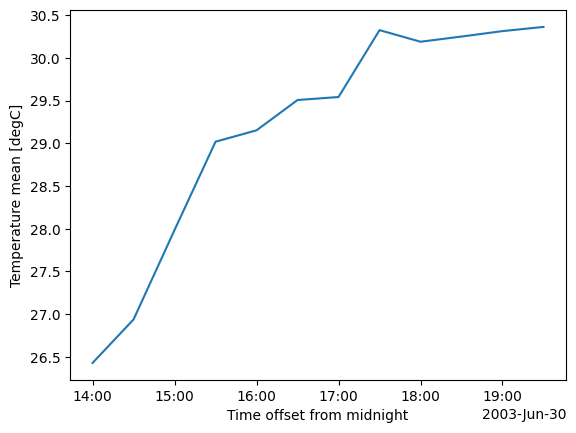

In [45]:
test_data['time'] = test_data['time'].roll(time=10*2)

test_data.isel(time=slice(0,12)).temp_mean.plot()

In [46]:
test_data

<xarray.Dataset> Size: 52kB
Dimensions:               (time: 1440)
Coordinates:
  * time                  (time) datetime64[ns] 12kB 2003-06-30T14:00:00 ... ...
Data variables:
    atmos_pressure        (time) float32 6kB ...
    temp_mean             (time) float32 6kB ...
    rh_mean               (time) float32 6kB ...
    wspd_arith_mean       (time) float32 6kB ...
    wspd_vec_mean         (time) float32 6kB ...
    wdir_vec_mean         (time) float32 6kB ...
    org_precip_rate_mean  (time) float32 6kB ...
Attributes: (12/30)
    command_line:                met_ingest -s twp -f C1 -R -D
    process_version:             ingest-met-4.28-0.el6
    dod_version:                 met-b1-8.1
    input_source:                /data/home/gervais/prod/jobs/0742/collection...
    site_id:                     twp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user gervais on machine amber at ...